In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('C:/Users/DebasishGuha/DG/Personal/MTech/Sem4/Project/work/DataFiles/Cust_single_view.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[1:]]
features.sample(10)

,TOTAL_USAGE_SUM,TOTAL_USAGE_MEAN,MIN_DAILY_USAGE_MEAN,MIN_DAILY_USAGE_MIN,MIN_DAILY_USAGE_Max,MAX_DAILY_USAGE_MEAN,MAX_DAILY_USAGE_MIN,MAX_DAILY_USAGE_Max,Record_Count,CURRENT_RATE_BILL_AMOUNT_SUM,CURRENT_RATE_BILL_AMOUNT_MEAN,PROFIT_SUM,PROFIT_MEAN,AGENT_ID,MEAN_TM_RPR,NBR_AR_UPGR,NBR_CPLN_OPN,NBR_CPLN_CLS
837,19390.71,1615.892500,35.775833,31.88,43.30,71.210833,58.74,84.86,12,3333.0,277.750000,-283.0600,-23.588333,1,3.03,6.787782,2,2
453,7699.50,641.625000,14.003333,11.75,18.34,28.735000,21.78,35.63,12,1437.0,119.750000,-35.5530,-2.962750,4,3.35,6.529287,3,3
639,9980.19,831.682500,17.447500,15.88,20.47,42.161667,34.00,54.04,12,1804.0,150.333333,-116.9257,-9.743808,1,3.28,3.313630,1,2
651,8543.97,711.997500,16.297500,15.83,17.04,30.707500,29.19,32.50,12,765.0,127.500000,48.9800,8.163333,2,2.01,2.666378,4,1
169,7794.80,649.566667,17.098333,15.85,19.46,27.297500,23.22,33.52,12,1401.2,116.766667,24.7630,2.063583,1,2.97,5.474711,3,3
685,25263.74,2105.311667,45.913333,44.63,50.79,103.906667,94.43,122.64,12,3626.0,302.166667,-170.3755,-14.197958,1,3.34,4.917934,1,2
786,10988.49,915.707500,23.425000,20.75,28.81,39.215000,30.92,50.73,12,1929.0,160.750000,-165.5860,-13.798833,2,2.90,6.053695,1,0
917,10824.40,902.033333,24.667500,24.16,25.48,35.992500,34.76,37.85,12,973.0,162.166667,85.6800,14.280000,2,2.86,2.687310,2,3
641,11016.01,918.000833,24.380000,22.62,27.50,38.297500,32.65,46.70,12,2122.0,176.833333,50.4262,4.202183,1,2.87,6.573280,3,0
37,9315.59,776.299167,17.800000,17.34,18.60,33.355833,31.79,34.82,12,842.0,140.333333,111.6000,18.600000,1,3.07,6.336116,5,0


In [11]:
# Remove the unnecessary columns from the data
data = data.loc[:,~data.columns.isin(['CUSTOMER_ID','AGENT_ID','Record_Count'])]

<AxesSubplot:>

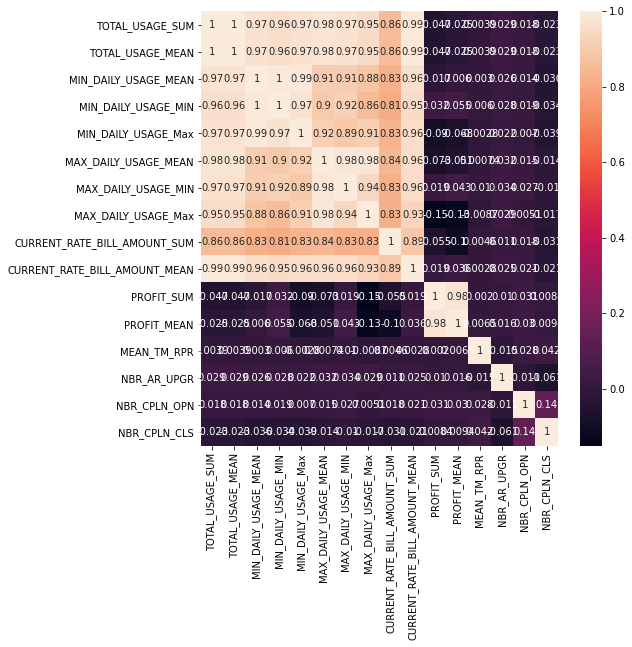

In [19]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(correlation_mat, annot = True)


In [31]:
data = data[['TOTAL_USAGE_MEAN','PROFIT_MEAN','MEAN_TM_RPR','NBR_AR_UPGR','NBR_CPLN_OPN','NBR_CPLN_CLS']]

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[1:]])


array([[-0.47254788, -0.12105674, -0.02099089],
       [ 0.00442566, -0.62934979, -0.31582456],
       [-0.442745  , -0.10757756,  0.09162859],
       [ 0.04401024, -0.5661795 , -0.44535623],
       [ 0.06148436, -0.60839742, -0.42039483],
       [-0.17439739,  0.25766357,  0.47280243],
       [ 0.039178  , -0.52184013, -0.32309279],
       [-0.24857035,  0.16116552,  0.29240015],
       [ 0.10767672,  0.08183539,  0.05171046],
       [ 0.12602702, -0.2424862 ,  0.24908465]])

In [ ]:
# Get two principal components
pca = PCA(n_components=3).fit(scaled_features)
features_3d = pca.transform(scaled_features)
features_3d[0:10]

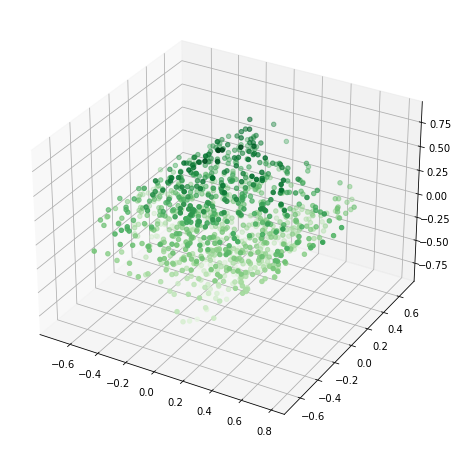

In [29]:
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = (15,15)
# Data for three-dimensional scattered points
zdata = features_3d[:,0]
xdata = features_3d[:,1]
ydata = features_3d[:,2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

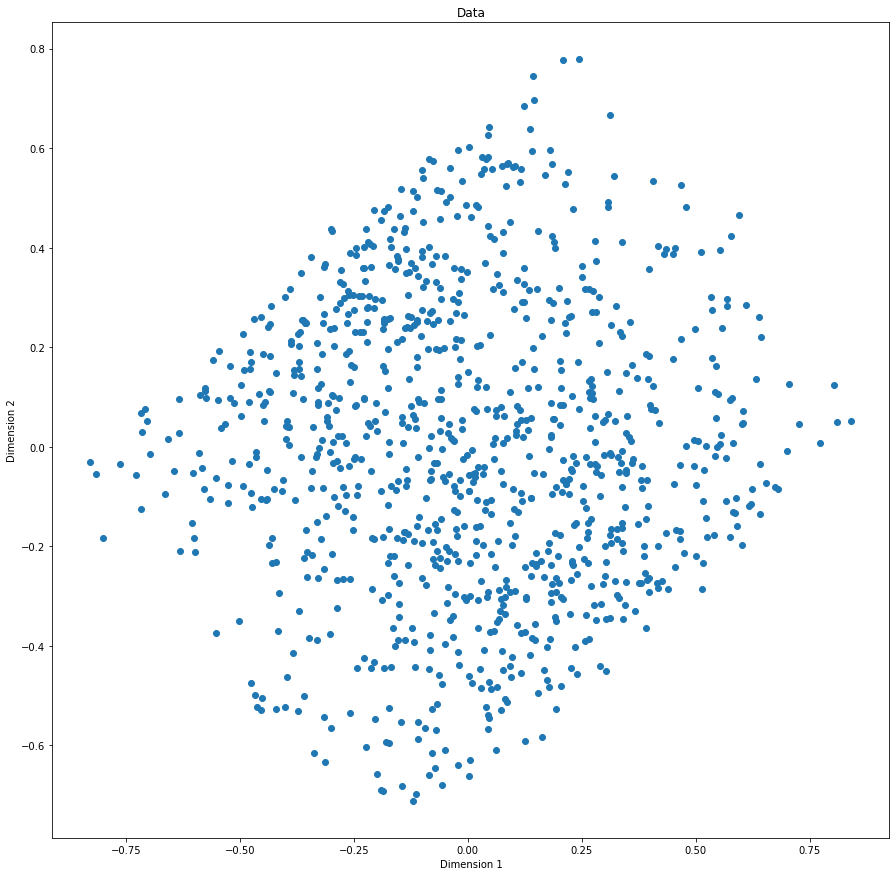

In [32]:
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
#model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters